In [1]:
import os 
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from matplotlib.lines import Line2D

In [2]:
def get_convType(name):
    if name =="gcnconv":
        return "GCNConv"
    elif name =="armaconv":
        return "ARMAConv"
    elif name =="eccconv":
        return "ECCConv"
    elif name =="gatconv":
        return "GATConv"
    elif name =="gcsconv":
        return "GCSConv"
    
def get_Loss(name):
    if name =="joints":
        return "joints"
    elif "parts" in name :
        return "parts"
    elif "fitness" in name :
        return "fit"
    elif "dissim" in name:
        return "sim"
    elif "None" in name:
        return "no"

In [3]:
path_out = "/home/adam/thesis/VGAE/framspy/plots/evolution/"

# ## baseline
baseline_path_models = "/home/adam/thesis/VGAE/experiments/evol_baseline/baseline/"
baseline_name = "baseline"


# ## base_evol
base_evol_path_models = "/home/adam/thesis/VGAE/experiments/experiment_evol/models/"
base_evol_path_configs = "/home/adam/thesis/VGAE/experiments/experiment_evol/config_evol/"
base_evol_model_names = "base_evol"
base_evol_model_names_new = "velocity data set"
## layers_evol
layers_evol_path_models = "/home/adam/thesis/VGAE/experiments/experiment_evol_loss/models_evol_loss/models/"
layers_evol_path_configs = "/home/adam/thesis/VGAE/experiments/experiment_evol_loss/models_evol_loss/models/config_evol/"
layers_evol_model_names = "layers_evol"
layers_evol_model_names_new = "velocity data set"
## vertpos_evol
vertpos15_evol_path_models = "/home/adam/thesis/VGAE/experiments/experiment_evol_verpots/models_vertpos/"
vertpos15_evol_path_configs = "/home/adam/thesis/VGAE/experiments/experiment_evol_verpots/models_vertpos/config_evol/"
vertpos15_evol_model_names = "vertpos15_evol"
vertpos15_evol_model_names_new = "vertpos data set"



columns = ['name', 'plot_name','new_name',  'log', 'max', 'mut_r', 'counter', 'loss_type', 'ae_type', 'convtype', 'latentdim', 'nhidden', 'convenc', 'denseenc', 'densedeca', 'convdecx', 'densedecx', 'path']

In [4]:
print(columns)

['name', 'plot_name', 'new_name', 'log', 'max', 'mut_r', 'counter', 'loss_type', 'ae_type', 'convtype', 'latentdim', 'nhidden', 'convenc', 'denseenc', 'densedeca', 'convdecx', 'densedecx', 'path']


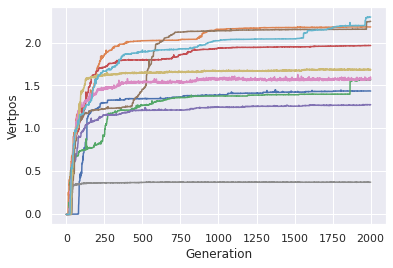

,name,plot_name,new_name,log,max,mut_r,counter,loss_type,ae_type,convtype,latentdim,nhidden,convenc,denseenc,densedeca,convdecx,densedecx,path
0,baseline,baseline1,f0 baseline,gen avg stddev min ...,1.446614,_,-1,_,_,_,_,_,_,_,_,_,_,/home/adam/thesis/VGAE/experiments/evol_baseli...
1,baseline,baseline2,f0 baseline,gen avg stddev min ...,2.187001,_,-1,_,_,_,_,_,_,_,_,_,_,/home/adam/thesis/VGAE/experiments/evol_baseli...
2,baseline,baseline3,f0 baseline,gen avg stddev min ...,1.570806,_,-1,_,_,_,_,_,_,_,_,_,_,/home/adam/thesis/VGAE/experiments/evol_baseli...
3,baseline,baseline4,f0 baseline,gen avg stddev min ...,1.969211,_,-1,_,_,_,_,_,_,_,_,_,_,/home/adam/thesis/VGAE/experiments/evol_baseli...
4,baseline,baseline5,f0 baseline,gen avg stddev min ...,1.276749,_,-1,_,_,_,_,_,_,_,_,_,_,/home/adam/thesis/VGAE/experiments/evol_baseli...
5,baseline,baseline6,f0 baseline,gen avg stddev min ...,2.250638,_,-1,_,_,_,_,_,_,_,_,_,_,/home/adam/thesis/VGAE/experiments/evol_baseli...
6,baseline,baseline7,f0 baseline,gen avg stddev min ...,1.627864,_,-1,_,_,_,_,_,_,_,_,_,_,/home/adam/thesis/VGAE/experiments/evol_baseli...
7,baseline,baseline8,f0 baseline,gen avg stddev min ...,0.371568,_,-1,_,_,_,_,_,_,_,_,_,_,/home/adam/thesis/VGAE/experiments/evol_baseli...
8,baseline,baseline9,f0 baseline,gen avg stddev min ...,1.695984,_,-1,_,_,_,_,_,_,_,_,_,_,/home/adam/thesis/VGAE/experiments/evol_baseli...
9,baseline,baseline10,f0 baseline,gen avg stddev min ...,2.304143,_,-1,_,_,_,_,_,_,_,_,_,_,/home/adam/thesis/VGAE/experiments/evol_baseli...


In [12]:
def load_baseline(name,path):
    baseline_all =  pd.DataFrame(columns=columns )
    for trainid in range(1,11,1):
        path_l=path +str(trainid)+"/"
        hof = path_l+"halloffame.gen"
        log_path = path_l+"logs.csv"
        try:
            log = pd.read_csv(log_path)
            plt.plot(list(log['max']), label='Line{0}'.format(trainid))
            data_model = [[name,name+str(trainid),"f0 "+name,log,max(log['max']),"_",-1,"_","_","_","_","_","_","_","_","_","_",path_l]]
            data_model = pd.DataFrame(data_model,columns=columns) 
            baseline_all = baseline_all.append(data_model, ignore_index=True)
        except Exception as e :
            print(e)
    plt.xlabel("Generation")
    plt.ylabel("Vertpos")
    plt.tight_layout
    plt.savefig(path_out+name+".pdf")
    plt.show()

    return baseline_all
        
baseline = load_baseline(baseline_name,baseline_path_models)
baseline

0.333
0.0333
0.0333
0.333
0.1
0.1
0.333
0.333
0.333
0.0333
0.1
0.1
0.333
[Errno 2] No such file or directory: '/home/adam/thesis/VGAE/experiments/experiment_evol_verpots/models_vertpos/joints/GAE/numfeatures3/adjsize15/batchsize256/latentdim15/nhidden64/learningrate0.01/convtypeGCSConv/model_enc_2_2_deca1_decx1_2_train_id_2/0.333/1/logs.csv'
0.333
0.333
0.0333
0.0333
0.0333
0.333
0.1
0.1
0.0333
0.0333
0.0333
0.0333
0.1
0.333
0.1
0.1
0.1
0.0333
0.333
0.1
0.0333
0.1
0.1
0.0333
0.333
0.333
0.333
0.0333
0.0333
0.1
0.1
0.1
0.333
0.0333
0.333
0.0333
0.1
0.0333
0.333
0.0333
0.1
0.333
0.333
0.0333
0.333
0.1
0.0333
0.333
0.1
0.0333
0.333
0.1
0.1


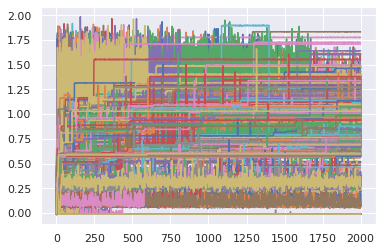

In [39]:

def load_to_df(name,new_name, configs,data):
    all_models= pd.DataFrame(columns=columns )
    batchsize = 256
    learningrate = 0.01
    numfeatures = 3
    adjsize = 15
    counter = 0
    for path, subdirs, files in os.walk(configs):
#         print(files)
        for file_name in files:
            if "vTrue" in file_name:
                ae_type = "VGAE"
            else:
                ae_type = "GAE"
            splitted = file_name.split("_")
#             print(splitted[9])
            convtype = get_convType(splitted[1])
            latentdim = splitted[2]
            nhidden = splitted[3]
            convenc = splitted[4]
            denseenc = splitted[5]
            densedeca = splitted[6]
            convdecx = splitted[7]
            densedecx = splitted[8]
            loss_type = get_Loss(splitted[9])
            mut_r = splitted[10]
#             return _
            plot_name = (name+"_ldim"+latentdim+"_"+ae_type+"_enc_"+str(convenc)+"_"+str(denseenc)+
                 "_deca"+str(densedeca)+
                 "_decx"+str(convdecx)+"_"+str(densedecx)+str(loss_type)+"loss"+"_"+mut_r)
            # Plot a simple line chart

            # Plot another line on the same chart/graph
            file1 = open(path+file_name, 'r')
            Lines = file1.readlines()
#             print(Lines[1])
            if Lines[1] == "1":                
                Lines[1] = "0.0333"
            print(str(float(Lines[1])))
            path_base = data+Lines[0].strip()+str(float(Lines[1]))+"/"
#             print(path_base)
#             return
#             fig,ax=plt.subplot()
            
            for trainid in range(1,11,1):
                path_l=path_base +str(trainid)+"/"
                hof = path_l+"halloffame.gen"
                log_path = path_l+"logs.csv"
                try:
#                     print(log_path)
                    log = pd.read_csv(log_path)
                    plt.plot(list(log['max']), label='Line{0}'.format(trainid))
                    data_model = [[name,plot_name,new_name,log,max(log['max']),mut_r,counter,str(ae_type)+"\n"+str(loss_type),ae_type,convtype,int(latentdim),nhidden,convenc,denseenc,densedeca,convdecx,densedecx,path_l]]
                    data_model = pd.DataFrame(data_model,columns=columns) 
                    all_models = all_models.append(data_model, ignore_index=True)
                except Exception as e :
                    print(e)

            

#             plt.xlabel("Generation")
#             plt.ylabel("Vertpos")
#             plt.tight_layout
#             print(plot_name)
#             plt.savefig(path_out+plot_name+".pdf")
#             plt.show()
            
            counter+=1
    return all_models

# load_to_df(layers_evol_model_names,layers_evol_model_names_new,layers_evol_path_configs,layers_evol_path_models)
models = load_to_df(vertpos15_evol_model_names,vertpos15_evol_model_names_new,vertpos15_evol_path_configs,vertpos15_evol_path_models)
models = models.append(load_to_df(layers_evol_model_names,layers_evol_model_names_new,layers_evol_path_configs,layers_evol_path_models), ignore_index=True)
base = load_to_df(base_evol_model_names,base_evol_model_names_new,base_evol_path_configs,base_evol_path_models)
# print(set(base['mut_r']))
models = models.append(base, ignore_index=True)

In [40]:
models = models.append(baseline, ignore_index=True)
models.shape

(669, 18)

In [41]:
def get_models_list_of_vertpos(all_models):
    current_columns = columns + ["vertpos_all","avg_vertpos"]
    finall_df  = pd.DataFrame(columns=current_columns )
    for name in list(set(all_models['name'])):
        name_models = all_models.loc[all_models['name']==name]
        counters  = set(name_models['counter'])
#         print(name_models.shape)
#         print(name_models)
        for c in counters:
            counter_models = name_models.loc[all_models['counter']==c]
            vertpos_all = list(counter_models['max'])
            row = counter_models.loc[counter_models['max']==max(vertpos_all)].iloc[0]
            row['vertpos_all'] = vertpos_all
            row['avg_vertpos']= np.mean(vertpos_all)
    #         row['mean_loss_train'] = np.mean(losses_train)
    #         row['mean_loss_test']= np.mean(losses_test)
    #         row['std_loss_train'] = np.std(losses_train)
    #         row['std_loss_test']= np.std(losses_test)
            finall_df = finall_df.append(row, ignore_index=True)
    return finall_df
finall_df = get_models_list_of_vertpos(models)

(1, 20)
baseline


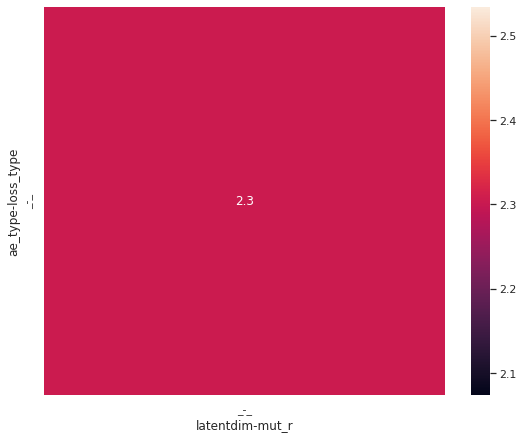

(18, 20)
layers_evol


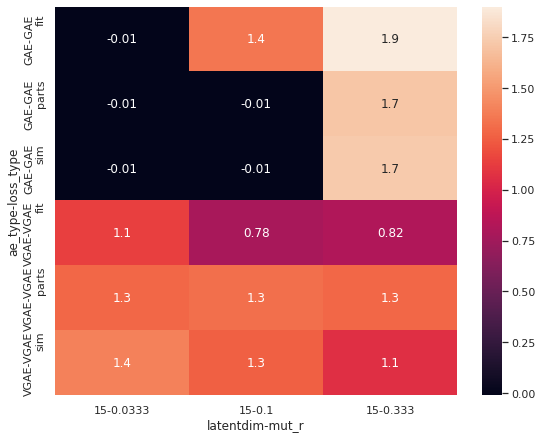

(30, 20)
vertpos15_evol


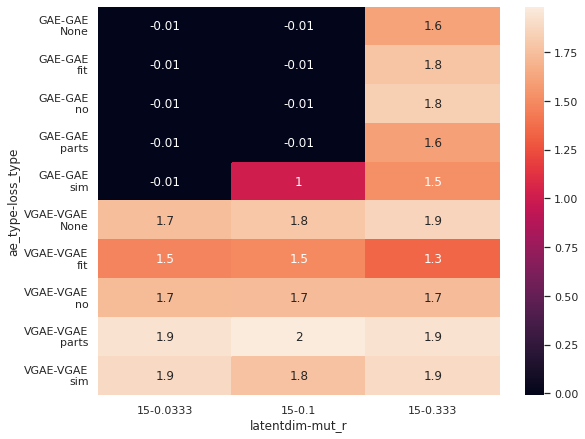

(18, 20)
base_evol


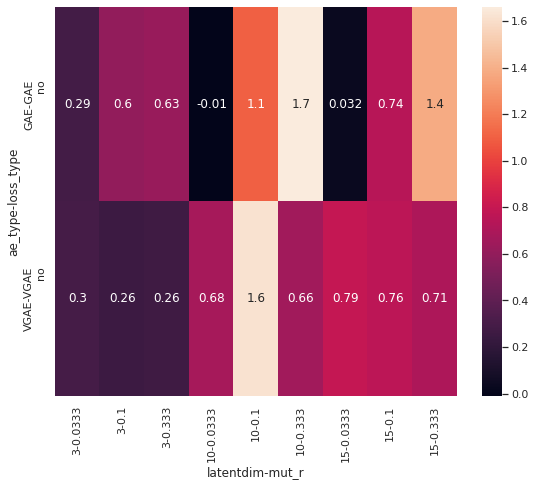

(1, 20)
baseline


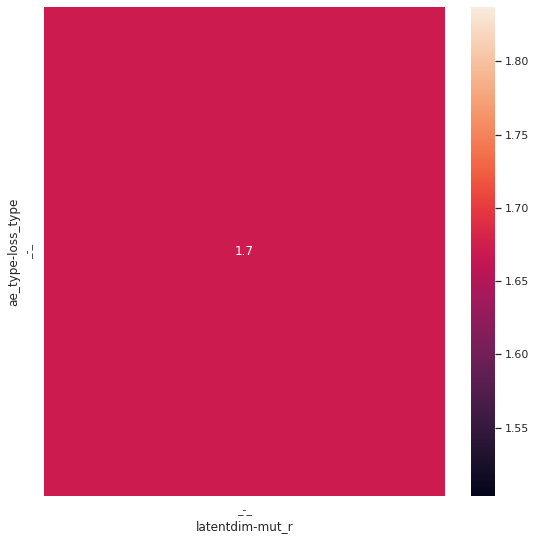

(18, 20)
layers_evol


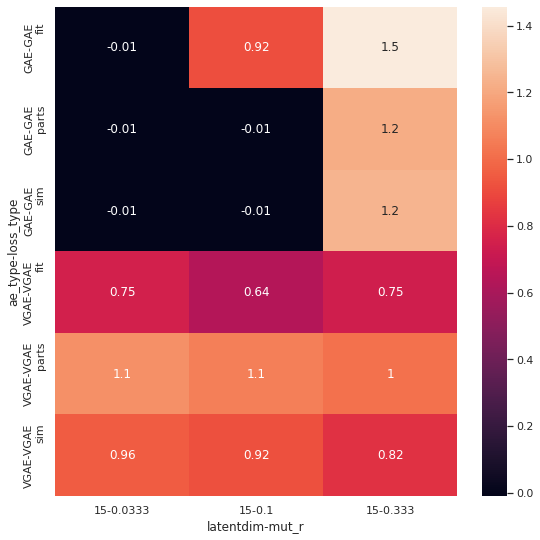

(30, 20)
vertpos15_evol


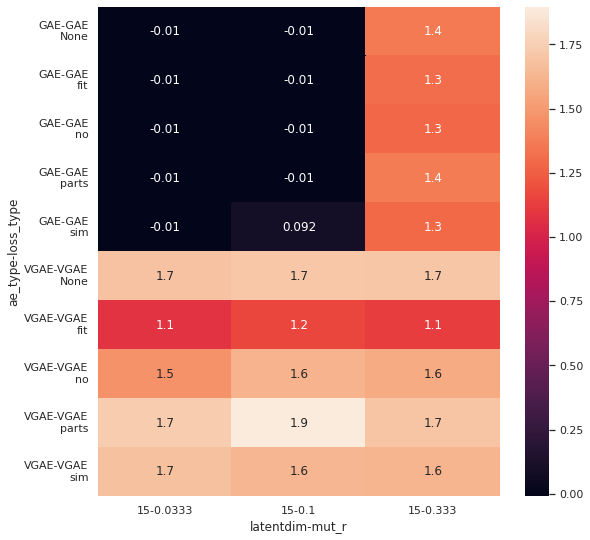

(18, 20)
base_evol


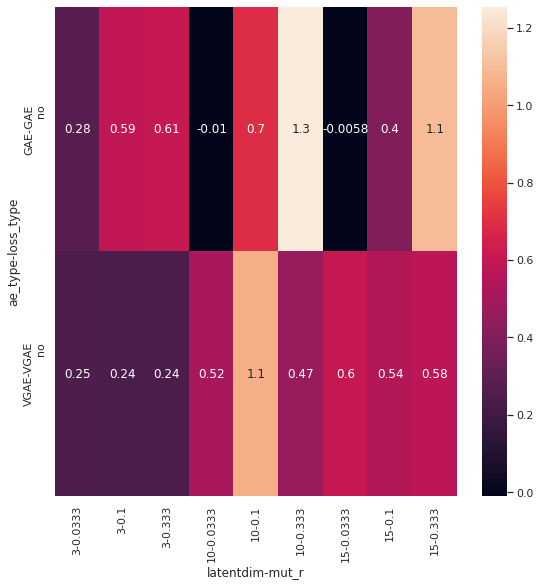

In [42]:

def get_heat_map_max_lot(df):
    
    for name in list(set(df['name'])):
        name_models = df.loc[df['name']==name]
        print(name_models.shape)
        print(name)
        piv = pd.pivot_table(name_models, values="max",index=["ae_type","loss_type"], columns=["latentdim","mut_r"], fill_value=0)
        fig = plt.figure(figsize=(9,9))
        sns.heatmap(piv, annot=True)
        plt.tight_layout
        plt.savefig(path_out+"maxvert{0}.pdf".format(name))
        plt.subplots_adjust(top=0.8, bottom=0.2)
        plt.show()
def get_heat_map_avg_lot(df):
    
    for name in list(set(df['name'])):
        name_models = df.loc[df['name']==name]
        print(name_models.shape)
        print(name)
        piv = pd.pivot_table(name_models, values="avg_vertpos",index=["ae_type","loss_type"], columns=["latentdim","mut_r"], fill_value=0)
        fig = plt.figure(figsize=(9,9))
        sns.heatmap(piv, annot=True)
        plt.tight_layout
        plt.savefig(path_out+"avgvert{0}.pdf".format(name))
        plt.show()
    
get_heat_map_max_lot(finall_df)
get_heat_map_avg_lot(finall_df)

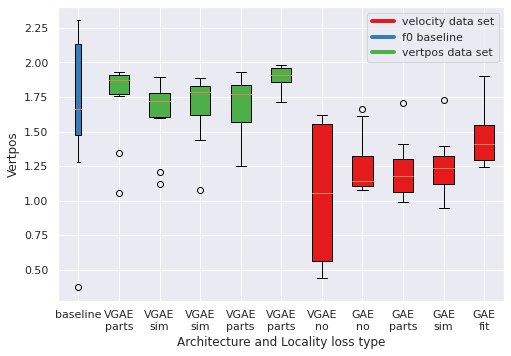

In [49]:
def gen_boxplot_all(df,n):
    fig, ax = plt.subplots(1,1,figsize=(8,5.4), sharey=True)
    c = 1
    color_labels = df['new_name'].unique()
    rgb_values = sns.color_palette("Set1", 4)
#         print(rgb_values)
    color_map = dict(zip(color_labels, rgb_values))
    for name in list(set(df['new_name'])):
        name_models = df.loc[df['new_name']==name]
        if name == "f0 baseline":
            best= name_models
            plot = ax.boxplot(best['vertpos_all'],
                       positions=[0],
#                      notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=['baseline'])
            colors = best['new_name'].map(color_map)
            for patch, color in zip(plot['boxes'], colors):
                patch.set_facecolor(color)
            
        else:
            best = name_models.loc[name_models['max'] > sorted(list(name_models['max']))[-n]] 
            plot = ax.boxplot(best['vertpos_all'],
                       positions=[c+i for i in range(n-1)],
#                      notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=best['loss_type'])
            
            colors = best['new_name'].map(color_map)
            for patch, color in zip(plot['boxes'], colors):
                patch.set_facecolor(color)           
            c+=n-1
        
    custom_lines = [Line2D([0], [0], color=rgb_values[0], lw=4),
                    Line2D([0], [0], color=rgb_values[1], lw=4),
                    Line2D([0], [0], color=rgb_values[2], lw=4),
                    Line2D([0], [0], color=rgb_values[3], lw=4)
                   ]
    ax.set_xlabel('Architecture and Locality loss type')
    ax.set_ylabel('Vertpos')
    ax.legend(custom_lines,color_map.keys())
    plt.tight_layout
    plt.savefig(path_out+"/boxplotevolall.pdf")
    plt.show()
gen_boxplot_all(finall_df,6)

In [38]:
list(finall_df.loc[finall_df['name'] == "baseline"]['vertpos_all'])

[[1.4466143976001642,
  2.187001287287506,
  1.5708063768260725,
  1.9692110384342043,
  1.2767490438869034,
  2.250638081507327,
  1.6278638935642005,
  0.3715683655891628,
  1.6959842415772666,
  2.3041426705529164]]